## Графики, Дашборды и Мониторинги

**1.** Ваш менее опытный коллега не уверен, что его таблица **retail** действительно создалась и добавилась в базу данных.
Напишите запрос, который создаст таблицу, если она еще не существует (**IF NOT EXISTS**), со следующими параметрами:

**Название: retail**

**База: test**

**Столбцы:**
- **InvoiceNo** – идентификатор заказа, строковое значение

- **StockCode** – идентификатор товара, строковое значение

- **Description** – описание товара, строковое значение

- **Quantity** – количество единиц товара, добавленных в корзину (особенность данных – значения могут быть отрицательными, 32 бита)

- **InvoiceDate** – дата и время создания заказа (транзакции), часовой пояс – 'Europe/London'

- **UnitPrice** – цена за единицу товара (особенность данных – значения могут быть отрицательными, точность – три знака после точки, 64 бита)

- **CustomerID** – идентификатор пользователя, целое положительное число, 32 бита.

- **Country** – страна, строковое значение. 

**Движок: MergeTree**

**Сортировка: InvoiceDate, CustomerID**

<div class="alert alert-block alert-warning"
<b>
<ol>
<b><li>CREATE TABLE IF NOT EXISTS test.retail (</li> </b>
<b><li>    InvoiceNo String,</li> </b>
<b><li>    StockCode String,</li></b>
<b><li>    Description String,</li></b>
<b><li>    Quantity Int32,</li></b>
<b><li>    InvoiceDate DateTime('Europe/London'),</li></b>
<b><li>    UnitPrice Decimal64(['3']),</li></b>
<b><li>    CustomerID UInt32,</li></b>
<b><li>    Country String</li></b>
<b><li>    ) </li></b>
<b><li>ENGINE = MergeTree </li></b>
<b><li>ORDER BY (InvoiceDate, CustomerID)</li> </b>
</ol>
</b>
</div>

**2.** В следующих шагах используется **default.retail** – данные о транзакциях британского интернет-магазина в период 
с 1 декабря 2010 по 9 декабря 2011, где:

**Для выполнения заданий и построения графиков вам понадобится Redash.**

Для начала посмотрите, в каких странах имеется наибольшее число уникальных пользователей. Постройте **барчарт**, где:

* **по оси x** – страна
* **по оси y** – число пользователей

**В качестве ответа укажите число уникальных пользователей из Великобритании.**

<div class="alert alert-block alert-warning"
<b>
<ol>
<b><li>SELECT </li> </b>
<b><li>    Country,</li></b> 
<b><li>    COUNT(DISTINCT CustomerID) as count_cust</li> </b>
<b><li>FROM retail</li> </b>
<b><li>GROUP BY Country</li> </b>
<b><li>ORDER BY count_cust DESC </li> </b>
<b><li>LIMIT 10</li> </b>
</ol>
</b>
</div>

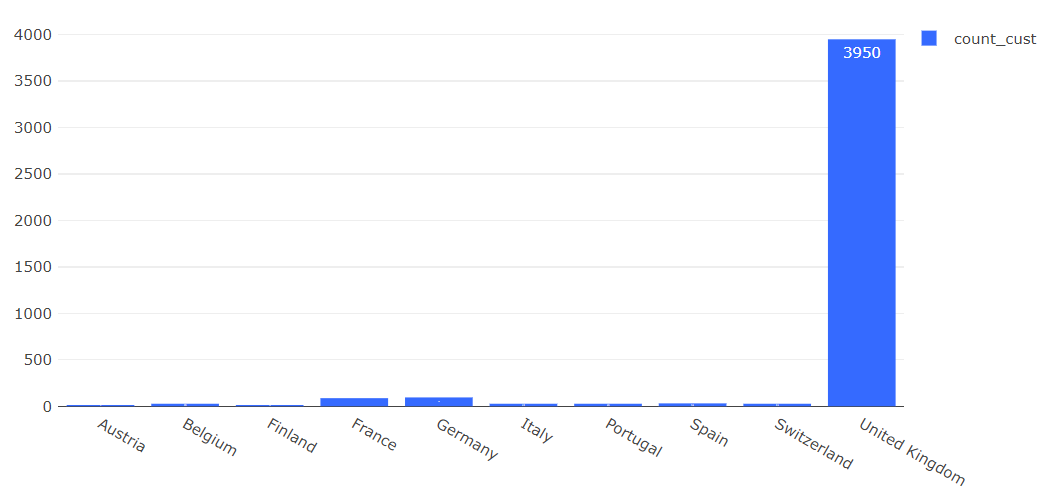

**3.** Следующая задача – посмотреть на динамику изменения числа активных пользователей в месяц в Великобритании, Австралии и Нидерландах. Полученная вами результирующая таблица должна иметь вид: страна - число уникальных пользователей за 
определённый месяц.

* **MAU (monthly active users)** – число уникальных пользователей за месяц. Активные пользователи – те, кто сделал хотя бы один заказ за выбранный промежуток времени (месяц).

**В качестве ответа укажите наименьшее число пользователей за февраль 2011.**

**Hint: toStartOfMonth()**

<div class="alert alert-block alert-warning"
<b>
<ol>
<b><li>SELECT </li></b>
<b><li>    Country,</li></b>
<b><li>    COUNT(DISTINCT CustomerID) as count_cust,</li></b>
<b><li>    toStartOfMonth(InvoiceDate) as start_month</li></b>
<b><li>FROM retail</li></b>
<b><li>WHERE Country IN ('United Kingdom','Australia','Netherlands')</li></b>
<b><li>GROUP BY Country,start_month</li></b>
<b><li>ORDER BY Country, start_month</li></b>
</ol>
</b>
</div>

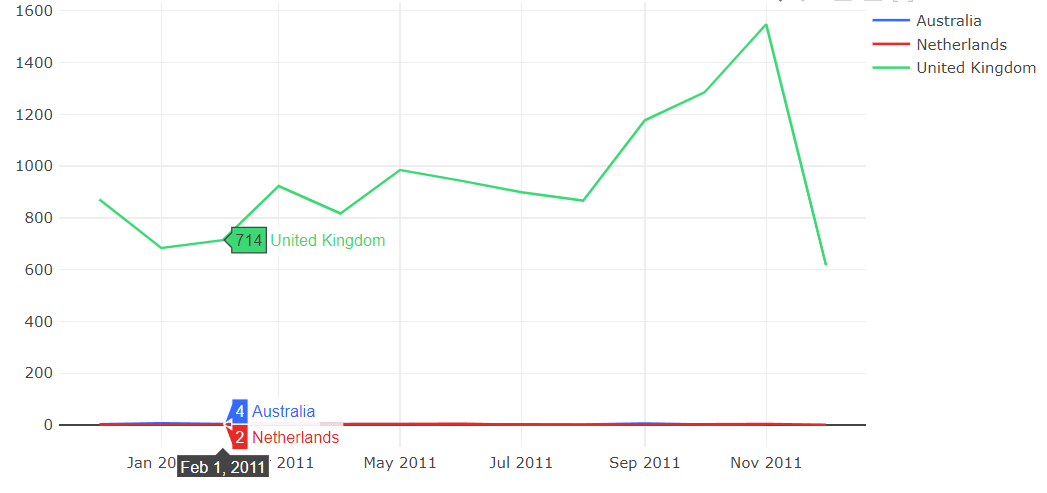

**4.** Как вы могли заметить, график с предыдущего шага получается не очень информативным для 2 из 3 стран.
Давайте посмотрим на динамику изменения числа активных пользователей в месяц уже для всех стран, кроме Великобритании.

**В каких месяцах число активных пользователей во Франции было больше, чем в Германии?**

**NB!** Фильтровать по Quantity здесь не нужно. 

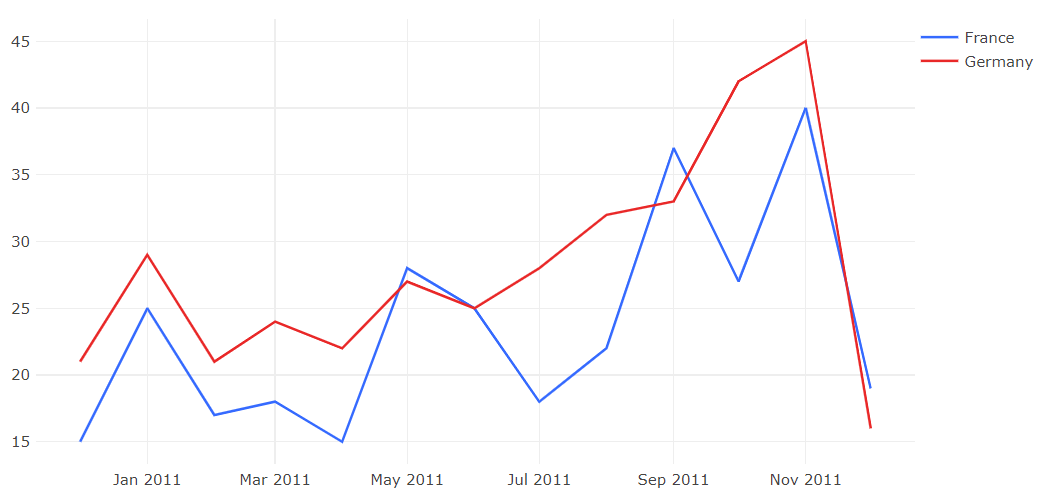

**5.** Теперь проанализируем сами заказы. Посчитайте среднюю сумму заказа (**AOV** – average order value) в каждой из стран.

Обратите внимание, что пользователь может добавить несколько одинаковых товаров в один заказ, и для подсчета суммы каждого заказа можно создать столбец **TotalPrice**, в котором будет храниться цена, которую пользователь заплатил, например, за три упаковки чая.

Далее для каждого заказа нужно просуммировать полученную колонку, а затем сгруппировать данные по странам и посчитать 
среднюю сумму заказа в каждой из них.

**Визуализируйте результат. Из представленных вариантов ответа выберите страны, входящие в топ-3 по величине средней суммы заказа.**

<div class="alert alert-block alert-warning"
<b>
<ol>
<b><li>SELECT </li></b>
<b><li>    Country,</li></b>
<b><li>    AVG(sum_price) as AOV</li></b>
<b><li>FROM</li></b>
<b><li>(SELECT </li></b>
<b><li>    InvoiceNo,Country, </li></b>
<b><li>    SUM(UnitPrice*Quantity) as sum_price</li></b>
<b><li>FROM retail</li></b>
<b><li>WHERE Quantity>0</li></b>
<b><li>GROUP BY InvoiceNo,Country)</li></b>
<b><li>GROUP BY Country</li></b>
</ol>
</b>
</div>

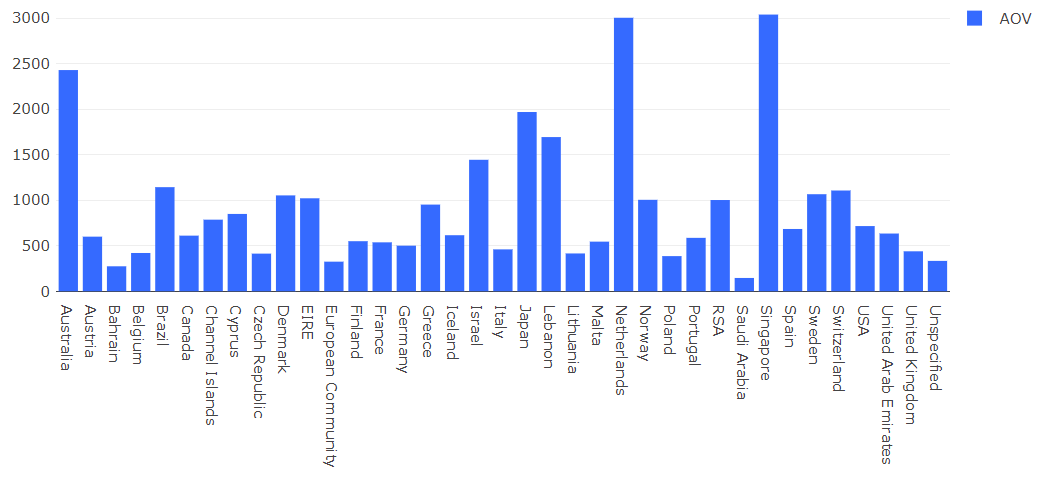

**6.** Как изменялась средняя сумма заказа в разных странах по месяцам?

Предположим, нас интересует динамика в следующих странах: United Kingdom, Germany, France, Spain, Netherlands, Belgium, Switzerland, Portugal, Australia, USA. Визуализируйте результат и выберите верные утверждения.

<div class="alert alert-block alert-warning"
<b>
<ol>
<b><li>SELECT</li></b>
<b><li>    Country,</li></b>
<b><li>    AVG(sum_price) as AOV,</li></b>
<b><li>    start_month</li></b>
<b><li>FROM</li></b>
<b><li>(SELECT</li></b>
<b><li>    InvoiceNo,Country,</li></b>
<b><li>    SUM(UnitPrice*Quantity) as sum_price,</li></b>
<b><li>    toStartOfMonth(InvoiceDate) as start_month</li></b>
<b><li>FROM retail</li></b>
<b><li>WHERE Quantity>0</li></b>
<b><li>GROUP BY InvoiceNo,Country,start_month)</li></b>
<b><li>WHERE Country IN ('United Kingdom', 'Germany', 'France', 'Spain', 'Netherlands', 'Belgium', 'Switzerland', 'Portugal', </li><b><li>'Australia', 'USA')</li></b>
<b><li>GROUP BY Country,start_month</li></b>
</ol>
</b>
</div>

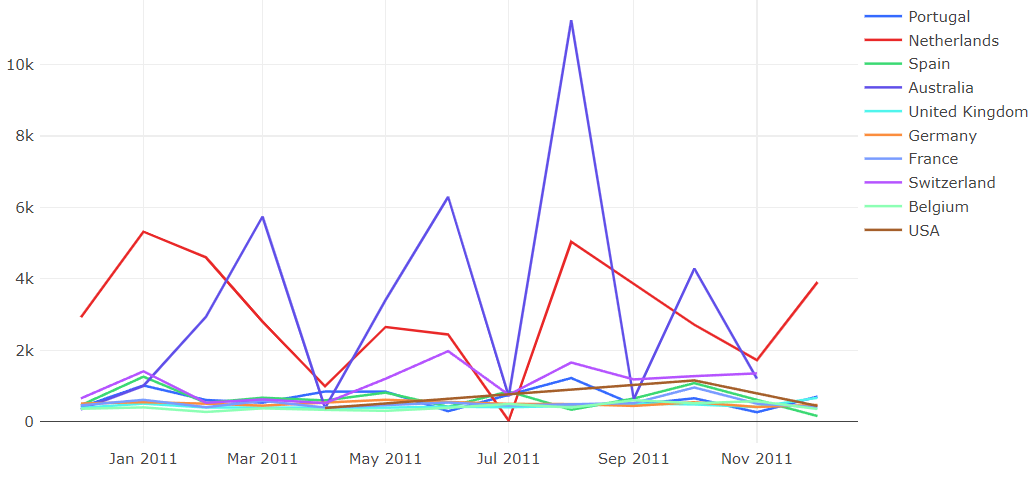

**7.** Сколько товаров пользователи обычно добавляют в корзину? Посчитайте среднее количество товаров, добавленных в корзину,  с разбивкой по странам.

**В качестве ответа укажите среднее число товаров в заказе среди пользователей в Канаде (Canada). Разделитель - точка.**

<div class="alert alert-block alert-warning"
<b>
<ol>
<b><li>SELECT AVG(quantity),Country</li></b>
<b><li>FROM</li></b>
<b><li>(SELECT </li></b>
<b><li>    SUM(Quantity) as quantity,</li></b>
<b><li>    Country</li></b>
<b><li>FROM retail</li></b>
<b><li>GROUP BY InvoiceNo,Country)</li></b>
<b><li>WHERE Country='Canada'</li></b>
<b><li>GROUP BY Country</li></b>
</ol>
</b>
</div>

**8.** Возможно, результат на предыдущем шаге показался вам странным, особенно если соотнести средний размер корзины с числом уникальных пользователей в некоторых странах. 

**Посмотрим на Нидерланды (Netherlands) более подробно. Сгруппируйте данные по пользователям и посмотрите, кто купил** 
**наибольшее число товаров. В ответе укажите идентификатор данного пользователя.**

<div class="alert alert-block alert-warning"
<b>
<ol>
<b><li>SELECT SUM(Quantity) as sum_quant,CustomerID</li></b>
<b><li>FROM retail</li></b>
<b><li>WHERE Country='Netherlands'</li></b>
<b><li>GROUP BY CustomerID</li></b>
<b><li>ORDER BY sum_quant DESC</li></b>
<b><li>LIMIT 1</li></b>
</ol>
</b>
</div>
